<h1 style="text-align: center; color: #B1C0CF; margin-top: 0; margin-bottom: 0; line-height: 1;"> Comunicando os resultados - Dashboard </h1></p></h2>
      </div>
</div>

## LIBRARIES

In [ ]:
# Standard libraries
import os
import sys
from pathlib import Path

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

In [3]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Model Classifier (for topics) 
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
from scipy.sparse import load_npz
import joblib
from sklearn.metrics.pairwise import cosine_similarity

# Directory management

In [6]:
# Find the project root (assuming marker-based or script-relative path)
def find_project_root(marker="README.md"):
    current_dir = Path.cwd()
    while current_dir != current_dir.parent:  # Traverse up until root
        if (current_dir / marker).exists():
            return current_dir
        current_dir = current_dir.parent
    raise FileNotFoundError(f"Marker '{marker}' not found in any parent directory.")

project_root = find_project_root()
sys.path.append(str(project_root)) 

# Or use a relative path: project_root = Path(__file__).resolve().parent.parent
os.chdir(project_root)
print(f"Working directory set to: {project_root}")

Working directory set to: c:\Users\rodri\Documents\1semestre\ICD\TrabalhoFinal\ObservatorioComunidadeCientifica


In [9]:
# Paths
BASE_DIR = project_root
DATA_DIR = BASE_DIR / "data"
DATA_FOR_VIS_DIR = DATA_DIR / "scopusUA"
MODELS_DIR = BASE_DIR / "models"

DATA_FOR_VIS_DIR.mkdir(exist_ok=True)
MODELS_DIR.mkdir(exist_ok=True)

INPUT_FILE = DATA_DIR / "Fact_Articles.csv"   # adapt if needed
MODEL_FILE = MODELS_DIR / "abstract_topic_classifier.joblib"

# OVERVIEW

## The Role of Streamlit and Application Design

Effective communication and visualization are central pillars of applied data science. Beyond building models and running analyses, a data scientist must translate complex results into insights that are accessible, interpretable, and actionable by diverse audiences: policymakers, researchers, businesses, or citizens.

This document provides a deep conceptual overview of:
- The purpose of communication and visualization in data science  
- How dashboards support these goals  
- Why Streamlit is a powerful tool for building such dashboards  
- A detailed explanation of the application skeleton previously introduced (classifier, visualizations, interpretability, semantic search, etc.), including each component’s conceptual role

---

## 1. Communication and Visualization in Data Science

### 1.1 Why We Communicate Results  
Data science is not only about computation — it is fundamentally about **making meaning**. Clear communication:
- Helps stakeholders understand patterns, trends, and anomalies  
- Transforms analysis into stories that inform decisions  
- Enables transparency and reproducibility  
- Supports collaboration between technical and non-technical audiences  

Without communication, even the most advanced models have limited impact.

### 1.2 The Purpose of Visualization  
Visualization bridges human perception and quantitative data. It allows:
- Rapid pattern detection  
- Comparison across categories or time  
- Identification of outliers and structure  
- Verification of modelling assumptions  
- Conveying uncertainty  

Good visualizations transform complex datasets into intuitive graphical representations that reveal insights not easily visible in tables or raw outputs.

### 1.3 Dashboards as Communication Tools  
Dashboards consolidate:
- Data summaries  
- Model outputs  
- Interactive controls  
- Visual insights  

into a single application. They enable:
- Exploration by the user  
- “What-if” experimentation  
- Tailored views of data  
- Reproducible reporting  

In education, dashboards help students understand how models behave, how data changes with filters, and how decisions affect outputs.

---

## 2. Streamlit as a Data Science Application Framework

### 2.1 Why Streamlit?  
Streamlit is designed for **data scientists, not web developers**. It provides:
- Simple, Python-only syntax  
- A reactive execution model (widgets trigger updates automatically)  
- Built‑in support for Pandas, Altair, Plotly, and machine‑learning models  
- Lightweight deployment options (local server, cloud services, containers)  

It removes the need to learn HTML, CSS, or JavaScript. Streamlit acts like a “live” Jupyter notebook that becomes an interactive app.

### 2.2 Streamlit’s Execution Model  
Streamlit works through **script reruns**:
- Every time a user interacts with a widget, the script runs from top to bottom  
- Cached functions ensure expensive operations do not repeat  
- The app remains stateful via `st.session_state` and widget keys  

This model is simple yet powerful: deterministic, debuggable, and aligned with notebook-style workflows.

### 2.3 Streamlit in learning process  
Streamlit enables:
- Exploratory dashboards for initial data understanding  
- Quick prototypes of machine‑learning applications  
- Tools for peer researchers to inspect models interactively  
- Interfaces to experiment with NLP, classifiers, clustering, or visualizations  


---

## 3. Overview of the Application Skeleton

The application described previously is a **modular, extensible Streamlit dashboard** built for a text‑mining workflow using a corpus collected from Scopus.

It includes:

1. **Overview page** – descriptive statistics, topic distributions  
2. **Topics Over Time** – temporal evolution of topics  
3. **Journals by Topic** – mapping research outlets to themes  
4. **Abstract Classifier** – user-input classification using a trained model  
5. **Interpretability Module** – influential terms per topic  
6. **Topic Model Comparison** – aligns supervised classifier with unsupervised topics  
7. **Semantic Search** – similarity-based retrieval of related documents  

Each part represents a communication component: visual explanation, model transparency, or interactive exploration.

Below is a deep breakdown of each component.

---

## 4. Dashboard Architecture: Detailed Description

### 4.1 Data Layer  
This layer is responsible for:
- Loading the preprocessed Scopus corpus  
- Loading aggregated tables (topic counts, topics by year, journals by topic)  
- Loading the trained classifier model  
- Loading interpretability tables  
- Loading semantic search matrices  

Caching ensures efficient runtime.

Conceptually, this layer corresponds to **data preparation**, separating raw files from interpretive layers.

---

### 4.2 Presentation Layer (Pages / Tabs)

#### 4.2.1 Overview Page  
**Goal:** Provide users with a high-level sense of the corpus.

Elements:
- Number of documents  
- Number of journals  
- Number of years  
- Number of topics  
- Bar chart of topic distribution  

**Conceptual purpose:**  
To ground the user: *What does the corpus look like? What is its composition? How balanced are topics?*

Understanding distribution is essential before interpreting classifier performance or trends.

---

#### 4.2.2 Topics Over Time  
**Goal:** Show how research interest in topics changes chronologically.

Elements:
- Multiselect filter for topics  
- Line chart (Altair) of number of documents per year per topic  

**Insights supported:**
- Growth or decline of themes  
- Parallel evolution of related topics  
- Temporal shifts in academic focus  

This view contextualizes the corpus historically.

---

#### 4.2.3 Journals by Topic  
**Goal:** Identify where research on each topic is published.

Elements:
- Select topic  
- Bar chart of journals contributing the most documents  

**Why this matters:**
- Reveals specialized journals  
- Supports literature reviews  
- Provides sociological insight into knowledge production structures  

---

#### 4.2.4 Abstract Classifier  
**Goal:** Allow the user to paste arbitrary text and predict its topic using the trained supervised classifier.

Elements:
- Text area for abstract input  
- Button for classification  
- Display of predicted topic  

**Pedagogical role:**
- Shows supervised learning applied to real text  
- Demonstrates inference-time behaviour of the trained model  
- Enables experimentation and intuition-building  

---

### 4.3 Model Interpretability Module  
**Goal:** Provide transparency on what drives the classifier's decisions.

The classifier is linear (LinearSVC), producing:
- A coefficient vector per topic  
- Term weights indicating influence  

We compute:
- Top ~20 terms per topic  
- Visualization via horizontal bar charts  

**Why interpretability matters:**
- Helps diagnose if the classifier uses meaningful features  
- Detects bias or noisy terminology  
- Supports credibility when presenting results  

Interpretability is central in social sciences, where justification of model decisions is expected.

---

### 4.4 Topic Model Comparison  
**Goal:** Compare outputs of an unsupervised topic model (e.g., LDA) with the supervised classifier.

Elements:
- Table showing topic-model label vs. classifier prediction  
- Cross-tabulation  

**Purpose:**
- Quality assurance for topic definitions  
- Investigation of ambiguous or inconsistent documents  
- Exploring disagreements between models  

This module strengthens students’ critical reasoning about modelling choices.

---

### 4.5 Semantic Search  
**Goal:** Retrieve similar documents using cosine similarity between TF‑IDF vectors.

Elements:
- Text area for query text  
- Slider for number of results  
- Table of top similar documents  

**Conceptual function:**
- Shows how vector spaces encode semantic proximity  
- Helps explore the corpus beyond discrete labels  
- Enhances interactive research workflows  

Semantic search is a powerful extension for text-mining applications.

---

## 6. Conclusion

Communication and visualization are not “extra steps”—they are the **core interface** between data, models, and human understanding. Streamlit provides a uniquely simple but powerful platform to transform analyses into interactive, interpretable applications.

The dashboard skeleton represents a complete communication workflow:
- Data summarization  
- Model exploration  
- Interpretability  
- Comparative modelling  
- Semantic exploration  

# LOAD DATA

In [10]:
df = pd.read_csv(INPUT_FILE)

In [11]:
df.columns

Index(['Article_ID', 'Title', 'Year', 'Topic_ID', 'DOI', 'Link', 'Abstract',
       'Cited by', 'Source title', 'Document Type'],
      dtype='object')

In [12]:
# Drop rows with missing abstracts or topics
df = df.dropna(subset=["Abstract", "Topic_ID"]).copy()
df["Abstract"] = df["Abstract"].astype(str)

# Ensure year is numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df = df.dropna(subset=["Year"]).copy()
df["Year"] = df["Year"].astype(int)

In [13]:
df.shape

(5000, 10)

## Preprocessing data with SpaCy

In [14]:
from scripts.auxTools.spacy_preprocess import spacy_tokenize_abstract
from tqdm.auto import tqdm
tqdm.pandas()

df["tokens_spacy"] = df["Abstract"].progress_apply(spacy_tokenize_abstract)
df["text_spacy"] = df["tokens_spacy"].apply(lambda toks: " ".join(toks))

df[["Abstract", "tokens_spacy", "text_spacy"]].head()

  0%|          | 0/5000 [00:00<?, ?it/s]

,Abstract,tokens_spacy,text_spacy
0,"Contrary to the adult central nervous system, ...","[contrary, adult, central, nervous, system, pe...",contrary adult central nervous system peripher...
1,Previous research established that the maximal...,"[previous, research, maximal, rank, abstract, ...",previous research maximal rank abstract regula...
2,The increased consumption and demand for seafo...,"[consumption, demand, seafood, increase, food,...",consumption demand seafood increase food fraud...
3,The genus Fusarium comprises filamentous fungi...,"[genus, fusarium, filamentous, fungus, soil, p...",genus fusarium filamentous fungus soil plant t...
4,Seedling emergence constitutes a critical recr...,"[seedling, emergence, critical, recruitment, s...",seedling emergence critical recruitment step e...


# Basic Dashboard elements: topic counts, topics over time, journals per topic

## topic counts

In [15]:
# Topic distribution
topic_counts = (
    df["Topic_ID"]
    .value_counts()
    .rename_axis("Topic_ID")
    .reset_index(name="n_docs")
)
topic_counts

,Topic_ID,n_docs
0,3,861
1,2,763
2,7,696
3,4,657
4,6,501
5,9,418
6,8,387
7,1,296
8,5,253
9,0,168


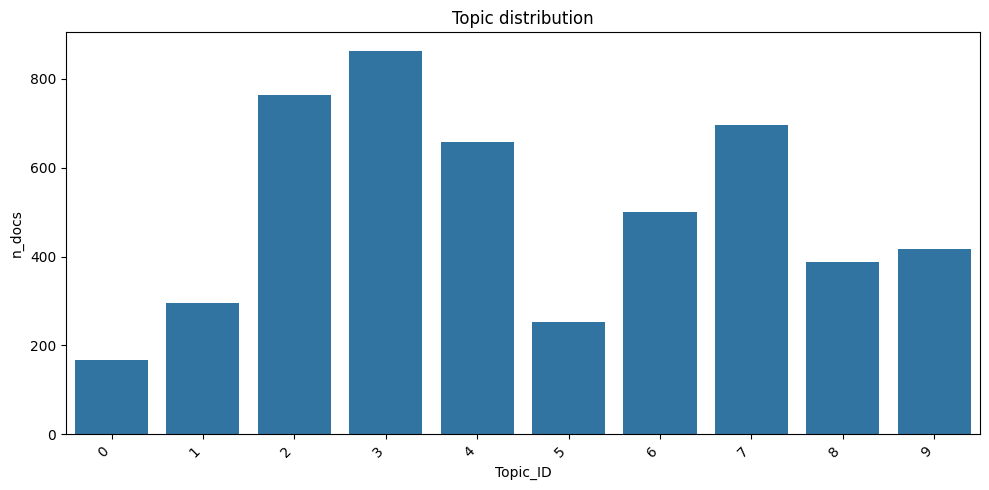

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(data=topic_counts, x="Topic_ID", y="n_docs")
plt.xticks(rotation=45, ha="right")
plt.title("Topic distribution")
plt.tight_layout()
plt.show()

In [17]:
TOPIC_COUNTS_FILE = DATA_FOR_VIS_DIR / "topic_counts.csv"
topic_counts.to_csv(TOPIC_COUNTS_FILE, index=False)
TOPIC_COUNTS_FILE

WindowsPath('c:/Users/rodri/Documents/1semestre/ICD/TrabalhoFinal/ObservatorioComunidadeCientifica/data/scopusUA/topic_counts.csv')

## topics over time

In [18]:
topics_over_time = (
    df.groupby(["Year", "Topic_ID"])
    .size()
    .reset_index(name="n_docs")
    .sort_values(["Year", "Topic_ID"])
)
topics_over_time.head()

,Year,Topic_ID,n_docs
0,2020,0,5
1,2020,1,9
2,2020,2,10
3,2020,3,32
4,2020,4,21


In [19]:
topics_over_time

,Year,Topic_ID,n_docs
0,2020,0,5
1,2020,1,9
2,2020,2,10
3,2020,3,32
4,2020,4,21
...,...,...,...
64,2026,4,2
65,2026,6,2
66,2026,7,2
67,2026,8,1


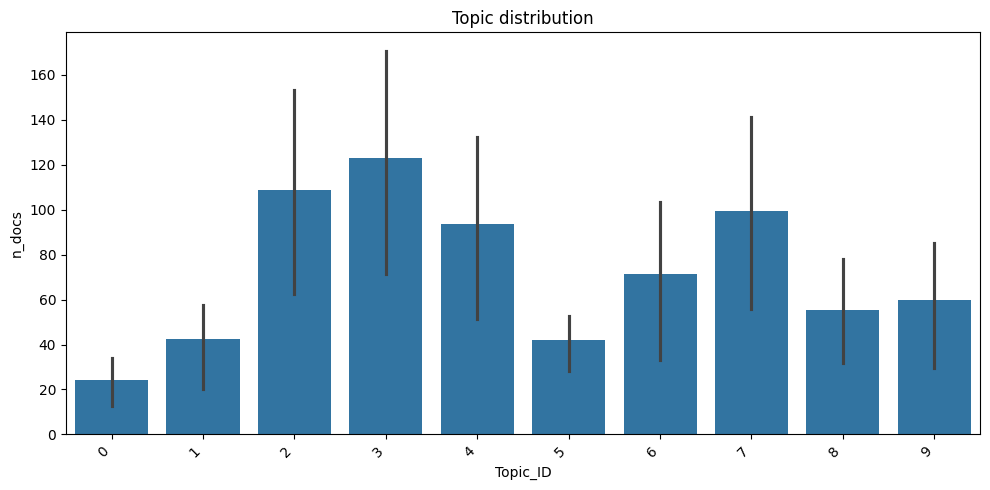

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(data=topics_over_time, x="Topic_ID", y="n_docs")
plt.xticks(rotation=45, ha="right")
plt.title("Topic distribution")
plt.tight_layout()
plt.show()

In [21]:
TOPICS_OVER_TIME_FILE = DATA_FOR_VIS_DIR / "topics_over_time.csv"
topics_over_time.to_csv(TOPICS_OVER_TIME_FILE, index=False)
TOPICS_OVER_TIME_FILE

WindowsPath('c:/Users/rodri/Documents/1semestre/ICD/TrabalhoFinal/ObservatorioComunidadeCientifica/data/scopusUA/topics_over_time.csv')

## journals per topic

In [22]:
journals_per_topic = (
    df.groupby(["Topic_ID", "Source title"])
    .size()
    .reset_index(name="n_docs")
    .sort_values(["Topic_ID", "n_docs"], ascending=[True, False])
)
journals_per_topic.head()

,Topic_ID,Source title,n_docs
2,0,Acta Medica Portuguesa,6
10,0,Applied Sciences (Switzerland),5
94,0,Rheumatology,4
57,0,Joint Bone Spine,3
58,0,Jornal Brasileiro de Pneumologia,3


In [23]:
JOURNALS_PER_TOPIC_FILE = DATA_FOR_VIS_DIR / "journals_per_topic.csv"
journals_per_topic.to_csv(JOURNALS_PER_TOPIC_FILE, index=False)
JOURNALS_PER_TOPIC_FILE

WindowsPath('c:/Users/rodri/Documents/1semestre/ICD/TrabalhoFinal/ObservatorioComunidadeCientifica/data/scopusUA/journals_per_topic.csv')

# Model classifier for topics

## Tfidf for classifier

In [24]:
from scripts.auxTools.spacy_preprocess import spacy_tokenize_abstract

In [25]:

from sklearn.feature_extraction.text import TfidfVectorizer

def spacy_analyzer(text: str):
    return spacy_tokenize_abstract(text)

tfidf = TfidfVectorizer(
    analyzer=spacy_analyzer,
    tokenizer=None,          # ignored because analyzer is set
    preprocessor=None,
    token_pattern=None,      # VERY IMPORTANT, otherwise sklearn will still apply its regex
    ngram_range=(1, 2),
    max_df=0.8,
    min_df=5,
    max_features=20000,
    sublinear_tf=True,
    norm="l2",
)



## data and train/test split

In [26]:
df.columns

Index(['Article_ID', 'Title', 'Year', 'Topic_ID', 'DOI', 'Link', 'Abstract',
       'Cited by', 'Source title', 'Document Type', 'tokens_spacy',
       'text_spacy'],
      dtype='object')

In [27]:
# Now build the pipeline as before
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = df["Abstract"]
y = df["Topic_ID"]

text_clf = Pipeline(
    [
        ("tfidf", tfidf),
        ("clf", LinearSVC())
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

text_clf.fit(X_train, y_train)




C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


## fit model

In [28]:
y_pred = text_clf.predict(X_test)

report_str = classification_report(y_test, y_pred)
print(report_str)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.63      0.44      0.52        59
           2       0.84      0.92      0.88       153
           3       0.84      0.88      0.86       172
           4       0.81      0.79      0.80       131
           5       0.86      0.86      0.86        51
           6       0.91      0.90      0.90       100
           7       0.86      0.96      0.91       139
           8       0.92      0.78      0.85        77
           9       0.93      0.88      0.90        84

    accuracy                           0.86      1000
   macro avg       0.86      0.84      0.85      1000
weighted avg       0.85      0.86      0.85      1000



## model evaluation

In [29]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).T
report_df

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,34.000
1,0.634146,0.440678,0.520000,59.000
2,0.838323,0.915033,0.875000,153.000
3,0.844444,0.883721,0.863636,172.000
4,0.806202,0.793893,0.800000,131.000
5,0.862745,0.862745,0.862745,51.000
6,0.909091,0.900000,0.904523,100.000
7,0.863636,0.956835,0.907850,139.000
8,0.923077,0.779221,0.845070,77.000
9,0.925000,0.880952,0.902439,84.000


### Confusion matrix

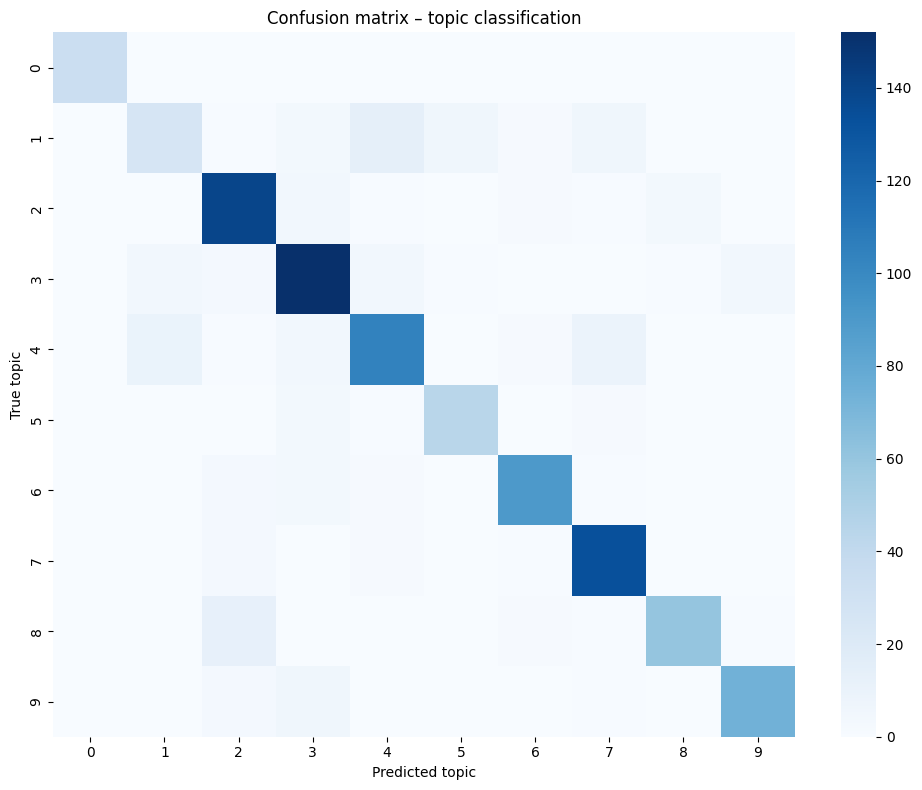

In [30]:
labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=False, cmap="Blues")
plt.xlabel("Predicted topic")
plt.ylabel("True topic")
plt.title("Confusion matrix – topic classification")
plt.tight_layout()
plt.show()


## save model

In [31]:
joblib.dump(text_clf, MODEL_FILE)
print(f"Model saved to {MODEL_FILE}")


Model saved to c:\Users\rodri\Documents\1semestre\ICD\TrabalhoFinal\ObservatorioComunidadeCientifica\models\abstract_topic_classifier.joblib


## Extract feature names and coefficients

For LinearSVC with a linear kernel, the classifier has a coefficient matrix we can inspect. We must extract the fitted TfidfVectorizer and the linear classifier.

In [32]:
# Extract fitted components from the pipeline
vectorizer = text_clf.named_steps["tfidf"]
clf = text_clf.named_steps["clf"]

feature_names = np.array(vectorizer.get_feature_names_out())
classes = clf.classes_     # topics, sorted
coef_matrix = clf.coef_    # shape: [n_classes, n_features]

feature_names[:10], classes

(array(['abdominal', 'abelian', 'ability', 'abiotic', 'ablation', 'able',
        'abnormal', 'abnormality', 'abrupt', 'abs'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [33]:
def get_top_terms_per_topic(coef_matrix, feature_names, classes, top_n=20):
    records = []
    for topic_idx, topic_label in enumerate(classes):
        coefs = coef_matrix[topic_idx]
        # indices of features sorted by descending weight
        top_idx = np.argsort(coefs)[::-1][:top_n]
        for rank, i in enumerate(top_idx, start=1):
            records.append({
                "Topic_ID": topic_label,
                "rank": rank,
                "term": feature_names[i],
                "weight": coefs[i]
            })
    return pd.DataFrame(records)

top_terms_df = get_top_terms_per_topic(coef_matrix, feature_names, classes, top_n=20)
top_terms_df.head()


,Topic_ID,rank,term,weight
0,0,1,available,2.013460
1,0,2,acorn,0.567266
2,0,3,inference,0.408534
3,0,4,bayesian,0.368397
4,0,5,convolution,0.315322


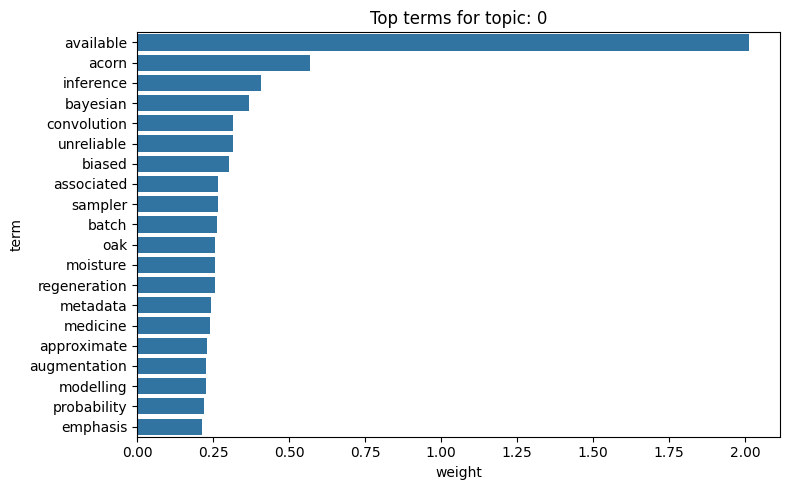

In [34]:
example_topic = classes[0]  # or choose manually

top_terms_topic = (
    top_terms_df[top_terms_df["Topic_ID"] == example_topic]
    .sort_values("weight", ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_terms_topic,
    x="weight",
    y="term",
    orient="h"
)
plt.title(f"Top terms for topic: {example_topic}")
plt.tight_layout()
plt.show()


In [35]:
INTERP_FILE = DATA_FOR_VIS_DIR / "top_terms_per_topic.csv"
top_terms_df.to_csv(INTERP_FILE, index=False)
print(f"Saved interpretability table to {INTERP_FILE}")


Saved interpretability table to c:\Users\rodri\Documents\1semestre\ICD\TrabalhoFinal\ObservatorioComunidadeCientifica\data\scopusUA\top_terms_per_topic.csv


# Semantic search basis

In [36]:
# Use the *fitted* vectorizer from the pipeline
X_tfidf = vectorizer.transform(df["Abstract"])
X_tfidf.shape

(5000, 5302)

In [37]:
from scipy.sparse import save_npz

TFIDF_FILE = DATA_FOR_VIS_DIR / "tfidf_matrix.npz"
DOC_INDEX_FILE = DATA_FOR_VIS_DIR / "doc_index.csv"

save_npz(TFIDF_FILE, X_tfidf)
df[["Title", "Abstract", "Topic_ID", "Source title", "Year"]].reset_index().rename(columns={"index": "doc_id"}).to_csv(DOC_INDEX_FILE, index=False)

TFIDF_FILE, DOC_INDEX_FILE


(WindowsPath('c:/Users/rodri/Documents/1semestre/ICD/TrabalhoFinal/ObservatorioComunidadeCientifica/data/scopusUA/tfidf_matrix.npz'),
 WindowsPath('c:/Users/rodri/Documents/1semestre/ICD/TrabalhoFinal/ObservatorioComunidadeCientifica/data/scopusUA/doc_index.csv'))